In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pickle
from sklearn.utils import shuffle
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.layers import Dropout, Flatten, Dense, Conv2D, MaxPooling2D
from tensorflow.keras.models import Sequential
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.utils import to_categorical

ModuleNotFoundError: No module named 'matplotlib.backends.registry'

In [149]:
# Load pickled datasets
def load_pickle(path):
    with open(path, 'rb') as f:
        return pickle.load(f)

train_data = load_pickle("Road_signs/train.p")
valid_data = load_pickle("Road_signs/valid.p")
test_data = load_pickle("Road_signs/test.p")


In [150]:
X_train, y_train = train_data['features'], train_data['labels']
X_valid, y_valid = valid_data['features'], valid_data['labels']
X_test, y_test = test_data['features'], test_data['labels']

In [151]:
print(X_test)

[[[[116 139 174]
   [116 137 171]
   [118 138 172]
   ...
   [ 98 114 143]
   [ 97 121 147]
   [ 85 105 130]]

  [[115 142 176]
   [115 140 174]
   [117 141 175]
   ...
   [119 143 176]
   [120 141 173]
   [120 139 171]]

  [[117 141 174]
   [117 142 175]
   [114 140 172]
   ...
   [120 144 179]
   [122 144 179]
   [120 143 177]]

  ...

  [[117 137 167]
   [115 134 164]
   [117 135 164]
   ...
   [115 137 169]
   [116 136 168]
   [118 139 172]]

  [[116 136 166]
   [114 134 168]
   [113 131 166]
   ...
   [113 135 167]
   [117 136 165]
   [115 139 167]]

  [[112 135 167]
   [110 134 165]
   [119 135 165]
   ...
   [115 138 167]
   [117 138 167]
   [114 140 170]]]


 [[[ 59  70  61]
   [ 87  80  63]
   [ 92  81  63]
   ...
   [ 77  64  67]
   [ 71  65  67]
   [ 74  69  68]]

  [[ 59  68  58]
   [ 94  83  65]
   [ 95  80  62]
   ...
   [ 77  64  66]
   [ 92  69  70]
   [ 85  68  68]]

  [[ 56  68  58]
   [ 90  84  67]
   [ 95  82  64]
   ...
   [ 72  65  66]
   [ 80  67  69]
   [ 79  69

In [152]:
np.unique(y_train)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42], dtype=uint8)

In [153]:
print("Training set:", X_train.shape)
print("Validation set:", X_valid.shape)
print("Test set:", X_test.shape)


Training set: (34799, 32, 32, 3)
Validation set: (4410, 32, 32, 3)
Test set: (12630, 32, 32, 3)


In [154]:
# y_train_cat = to_categorical(y_train)
# y_valid_cat = to_categorical(y_valid)
# y_test_cat = to_categorical(y_test)

Text(0.5, 1.0, '41')

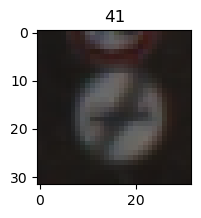

In [155]:
plt.figure(figsize=(10,2))
plt.imshow(X_train[0])
plt.title(y_train[0])

In [156]:
# Normalize the data
X_train = X_train / 255.0
X_valid = X_valid / 255.0
X_test = X_test / 255.0

In [157]:
X_train, y_train = shuffle(X_train, y_train)

In [158]:
sign_names = pd.read_csv("Road_signs/signname.csv")
label_dict = dict(zip(sign_names['ClassId'], sign_names['SignName']))

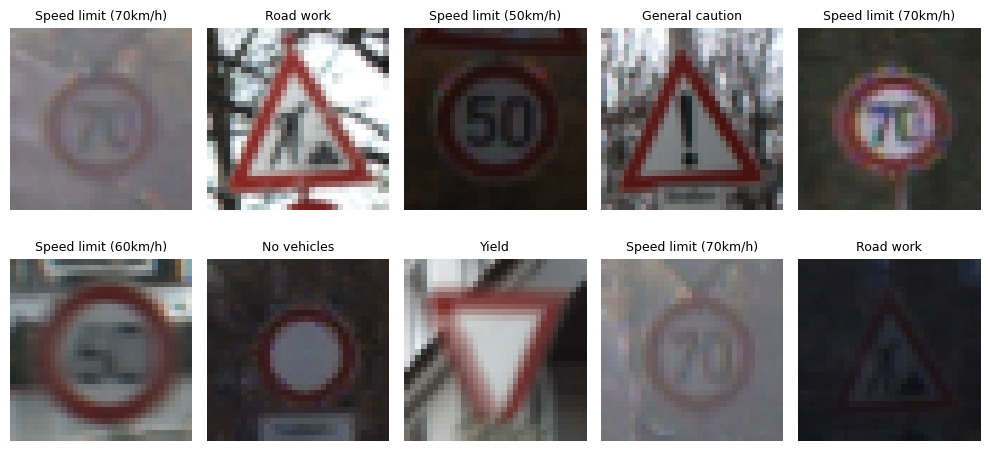

In [159]:
plt.figure(figsize=(10, 5))  

for i in range(10):
    plt.subplot(2, 5, i + 1)  
    plt.imshow(X_train[i])
    plt.title(label_dict[y_train[i]], fontsize=9)
    plt.axis('off')

plt.tight_layout()
plt.show()

In [160]:
model = Sequential([Conv2D(32,(3,3),activation='relu',input_shape=(32,32,3)),
                   MaxPooling2D((2,2)),

                   Conv2D(64,(3,3),activation='relu'),
                   MaxPooling2D((2,2)),

                   Conv2D(64,(3,3),activation='relu'),

                   Flatten(),
                   Dense(64,activation='relu'),
                   Dense(43,activation='softmax')

                   ])

c:\Users\yahav\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [161]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [147]:
# model.summary()

In [162]:
history = model.fit(X_train, y_train,epochs=10,batch_size=64,validation_data=(X_valid, y_valid))


Epoch 1/10
544/544 ━━━━━━━━━━━━━━━━━━━━ 12s 17ms/step - accuracy: 0.3914 - loss: 2.3109 - val_accuracy: 0.8478 - val_loss: 0.5940
Epoch 2/10
544/544 ━━━━━━━━━━━━━━━━━━━━ 8s 15ms/step - accuracy: 0.9272 - loss: 0.2613 - val_accuracy: 0.8900 - val_loss: 0.3918
Epoch 3/10
544/544 ━━━━━━━━━━━━━━━━━━━━ 8s 15ms/step - accuracy: 0.9725 - loss: 0.1132 - val_accuracy: 0.9159 - val_loss: 0.3609
Epoch 4/10
544/544 ━━━━━━━━━━━━━━━━━━━━ 8s 15ms/step - accuracy: 0.9825 - loss: 0.0666 - val_accuracy: 0.9240 - val_loss: 0.3404
Epoch 5/10
544/544 ━━━━━━━━━━━━━━━━━━━━ 8s 15ms/step - accuracy: 0.9877 - loss: 0.0558 - val_accuracy: 0.9200 - val_loss: 0.3798
Epoch 6/10
544/544 ━━━━━━━━━━━━━━━━━━━━ 8s 15ms/step - accuracy: 0.9894 - loss: 0.0383 - val_accuracy: 0.9422 - val_loss: 0.2534
Epoch 7/10
544/544 ━━━━━━━━━━━━━━━━━━━━ 8s 15ms/step - accuracy: 0.9910 - loss: 0.0324 - val_accuracy: 0.9431 - val_loss: 0.2317
Epoch 8/10
544/544 ━━━━━━━━━━━━━━━━━━━━ 8s 15ms/step - accuracy: 0.9920 - loss: 0.0282 - val_acc

In [163]:
test_loss, test_acc = model.evaluate(X_test, y_test)
print("Test accuracy:", test_acc)


395/395 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9286 - loss: 0.4151
Test accuracy: 0.9279493093490601


In [164]:
train_loss, train_acc = model.evaluate(X_train, y_train)
print("Train accuracy:", train_acc)


1088/1088 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.9958 - loss: 0.0136
Train accuracy: 0.9955458641052246


In [165]:
y_pred_prob = model.predict(X_test)
y_pred = y_pred_prob.argmax(axis=1)
y_true = y_test.flatten()

395/395 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step


In [166]:
for i in range(20):
    print(f"Actual: {label_dict[y_true[i]]}  Predicted: {label_dict[y_pred[i]]}")

Actual: Vehicles over 3.5 metric tons prohibited  Predicted: Vehicles over 3.5 metric tons prohibited
Actual: Speed limit (30km/h)  Predicted: Speed limit (30km/h)
Actual: Keep right  Predicted: Keep right
Actual: Turn right ahead  Predicted: Turn right ahead
Actual: Right-of-way at the next intersection  Predicted: Right-of-way at the next intersection
Actual: Keep right  Predicted: Keep right
Actual: General caution  Predicted: General caution
Actual: Priority road  Predicted: Priority road
Actual: Road work  Predicted: Road work
Actual: Ahead only  Predicted: Ahead only
Actual: Priority road  Predicted: Priority road
Actual: Speed limit (100km/h)  Predicted: Speed limit (100km/h)
Actual: Slippery road  Predicted: Slippery road
Actual: Speed limit (100km/h)  Predicted: Speed limit (100km/h)
Actual: Speed limit (70km/h)  Predicted: Speed limit (70km/h)
Actual: No passing  Predicted: No passing
Actual: Double curve  Predicted: Double curve
Actual: Dangerous curve to the right  Predicte

In [167]:
print(classification_report(y_test, y_pred , target_names=sign_names['SignName'].values))

                                               precision    recall  f1-score   support

                         Speed limit (20km/h)       0.94      0.73      0.82        60
                         Speed limit (30km/h)       0.94      0.96      0.95       720
                         Speed limit (50km/h)       0.90      0.95      0.92       750
                         Speed limit (60km/h)       0.89      0.89      0.89       450
                         Speed limit (70km/h)       0.97      0.96      0.96       660
                         Speed limit (80km/h)       0.86      0.91      0.88       630
                  End of speed limit (80km/h)       0.97      0.79      0.87       150
                        Speed limit (100km/h)       0.98      0.88      0.93       450
                        Speed limit (120km/h)       0.94      0.94      0.94       450
                                   No passing       0.95      0.98      0.97       480
 No passing for vehicles over 3.5 metric t

## Optimizing

In [168]:
model = models.Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(32,32,3)),
    MaxPooling2D(2,2),
    Dropout(0.25),

    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(2,2),
    Dropout(0.25),
    
    Conv2D(128, (3,3), activation='relu'),
    MaxPooling2D(2,2),
    Dropout(0.25),

    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(43, activation='softmax')
])


c:\Users\yahav\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [169]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [170]:
early_stop = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

In [171]:
tunned = model.fit(X_train, y_train,epochs=50,batch_size=32,callbacks=[early_stop],validation_data=(X_valid, y_valid))

Epoch 1/50
1088/1088 ━━━━━━━━━━━━━━━━━━━━ 21s 17ms/step - accuracy: 0.1947 - loss: 2.9363 - val_accuracy: 0.6655 - val_loss: 1.0937
Epoch 2/50
1088/1088 ━━━━━━━━━━━━━━━━━━━━ 23s 21ms/step - accuracy: 0.6782 - loss: 0.9695 - val_accuracy: 0.9036 - val_loss: 0.3895
Epoch 3/50
1088/1088 ━━━━━━━━━━━━━━━━━━━━ 24s 22ms/step - accuracy: 0.8501 - loss: 0.4575 - val_accuracy: 0.9442 - val_loss: 0.2279
Epoch 4/50
1088/1088 ━━━━━━━━━━━━━━━━━━━━ 21s 19ms/step - accuracy: 0.8991 - loss: 0.3156 - val_accuracy: 0.9512 - val_loss: 0.2569
Epoch 5/50
1088/1088 ━━━━━━━━━━━━━━━━━━━━ 12s 11ms/step - accuracy: 0.9278 - loss: 0.2257 - val_accuracy: 0.9546 - val_loss: 0.1880
Epoch 6/50
1088/1088 ━━━━━━━━━━━━━━━━━━━━ 12s 11ms/step - accuracy: 0.9397 - loss: 0.1921 - val_accuracy: 0.9737 - val_loss: 0.1418
Epoch 7/50
1088/1088 ━━━━━━━━━━━━━━━━━━━━ 12s 11ms/step - accuracy: 0.9492 - loss: 0.1640 - val_accuracy: 0.9658 - val_loss: 0.1559
Epoch 8/50
1088/1088 ━━━━━━━━━━━━━━━━━━━━ 12s 11ms/step - accuracy: 0.9536 -

In [172]:
test_loss, test_acc = model.evaluate(X_test, y_test)
print("Test accuracy:", test_acc)
train_loss, train_acc = model.evaluate(X_train, y_train)
print("Train accuracy:", train_acc)

395/395 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9639 - loss: 0.1769
Test accuracy: 0.963341236114502
1088/1088 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.9982 - loss: 0.0062
Train accuracy: 0.9982183575630188


In [173]:
y_pred_prob = model.predict(X_test)
y_pred = y_pred_prob.argmax(axis=1)
y_true = y_test.flatten()

395/395 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step


In [174]:
for i in range(10):
    print(f"Actual: {label_dict[y_true[i]]}  Predicted: {label_dict[y_pred[i]]}")


Actual: Vehicles over 3.5 metric tons prohibited  Predicted: Vehicles over 3.5 metric tons prohibited
Actual: Speed limit (30km/h)  Predicted: Speed limit (30km/h)
Actual: Keep right  Predicted: Keep right
Actual: Turn right ahead  Predicted: Turn right ahead
Actual: Right-of-way at the next intersection  Predicted: Right-of-way at the next intersection
Actual: Keep right  Predicted: Keep right
Actual: General caution  Predicted: General caution
Actual: Priority road  Predicted: Priority road
Actual: Road work  Predicted: Road work
Actual: Ahead only  Predicted: Ahead only


In [175]:
print(classification_report(y_test, y_pred , target_names=sign_names['SignName'].values))

                                               precision    recall  f1-score   support

                         Speed limit (20km/h)       1.00      0.97      0.98        60
                         Speed limit (30km/h)       0.97      0.99      0.98       720
                         Speed limit (50km/h)       0.98      0.99      0.98       750
                         Speed limit (60km/h)       0.99      0.93      0.96       450
                         Speed limit (70km/h)       1.00      0.98      0.99       660
                         Speed limit (80km/h)       0.91      0.96      0.94       630
                  End of speed limit (80km/h)       0.99      0.93      0.96       150
                        Speed limit (100km/h)       0.99      0.95      0.97       450
                        Speed limit (120km/h)       0.96      0.97      0.97       450
                                   No passing       0.97      1.00      0.98       480
 No passing for vehicles over 3.5 metric t

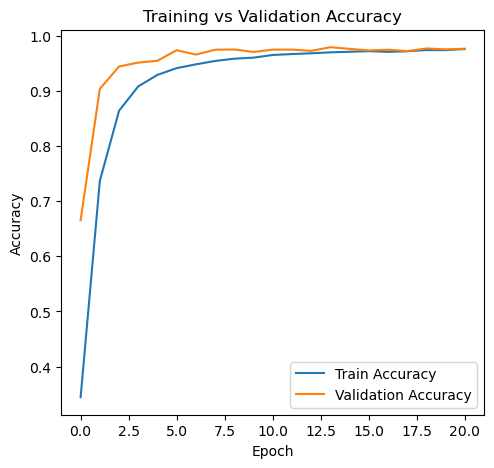

In [177]:
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(tunned.history['accuracy'], label='Train Accuracy')
plt.plot(tunned.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training vs Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()


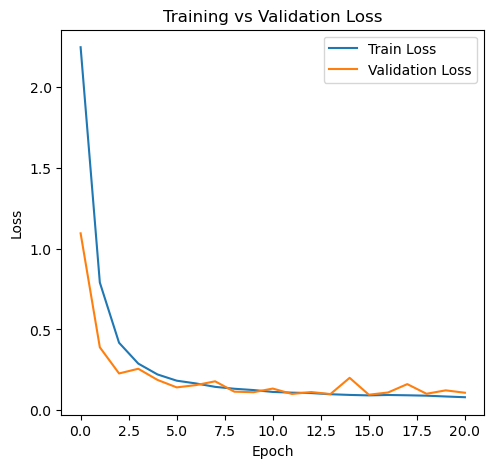

In [179]:
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 2)
plt.plot(tunned.history['loss'], label='Train Loss')
plt.plot(tunned.history['val_loss'], label='Validation Loss')
plt.title('Training vs Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

In [183]:
model.save("road_sign_model.h5")
